In [1]:
import sys, os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.patches as mp

In [2]:
# GE 1.5MW SLE details

D = 77 # m
H = 80 # m
vrated = 14 #m/s
prated = 1500 # kW


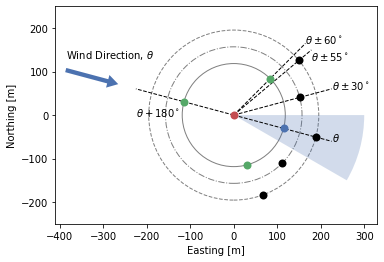

In [3]:
rotangle = -15
rt = np.array([[H+D/2, 180], [H+D/2, -60], [H+D/2, 60], [H+D, -30], [H+D, 30], [H+3*D/2, -55], [H+3*D/2, 0], [H+3*D/2, 55], ])
rt[:,1] += rotangle

fig,ax = plt.subplots()

r0 = mp.Circle((0,0), H+D/2, fill=False, edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+D, fill=False, ls='-.', edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+3*D/2, fill=False, ls='--', edgecolor='gray')
ax.add_patch(r0)

angles = [0, 30, 55, 60, 180]
# angles = np.unique(rt[:,1])[np.unique(rt[:,1]) >=-20]
rpos = np.arange(0,(H+2*D))

labels = [r'$\theta$', r'$\theta \pm 30^\circ$',  r'$\theta \pm 55^\circ$',  r'$\theta \pm 60^\circ$', r'$\theta+180^\circ$',]

for ii, angle in enumerate(angles):
    arx, ary = rpos*np.cos(np.radians(angle+rotangle)), rpos*np.sin(np.radians(angle+rotangle))
    plt.plot(arx, ary, '--k', lw=1, )
    txt = plt.text(arx[-1], ary[-1], labels[ii])#r'$\theta \pm {}^\circ$'.format(-angle+90))
    if ii == 2:
        txt.set_verticalalignment('top')
    if ii == 4:
        txt.set_verticalalignment('top')
        txt.set_y(ary[-1]-40)
#         txt.set_horizontalalignment('center')

arx, ary = 400*np.cos(np.radians(180+rotangle)), 400*np.sin(np.radians(180+rotangle))
darx, dary = 125*np.cos(np.radians(rotangle)), 125*np.sin(np.radians(rotangle))
a0 = mp.Arrow(arx, ary, darx, dary, width=50)
ax.add_patch(a0)
plt.text(arx, ary+20, r'Wind Direction, $\theta$', va='bottom', ha='left')

w0 = mp.Wedge((0,0), 300, -30, 0, alpha = 0.25)
ax.add_patch(w0)

mic_x = np.array([rt[ii,0]*np.cos(np.radians(rt[ii,1])) for ii in range(len(rt))])
mic_y = np.array([rt[ii,0]*np.sin(np.radians(rt[ii,1])) for ii in range(len(rt))])

ax.plot(0, 0,  'o', markerfacecolor='C2', markeredgecolor='none', markersize=8)
ax.plot((H+D/2)*np.cos(np.radians(rotangle)), (H+D/2)*np.sin(np.radians(rotangle)), 'o', markerfacecolor='C0', markeredgecolor='none', markersize=8)
ax.plot(mic_x[:3], mic_y[:3], 'o', markerfacecolor='C1', markeredgecolor='none', markersize=8)
ax.plot(mic_x[3:], mic_y[3:], 'ok', markeredgecolor='none', markersize=8)


plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.xlim([-410, 330])
plt.ylim([-250, 250])
ax.set_aspect('equal')

fig.savefig('../figs/meas_locs.pdf', bbox_inches=0)

In [4]:
from labellines import labelLine, labelLines

83.72727272727273


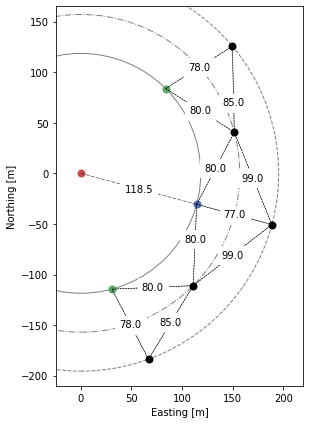

In [5]:
rotangle = -15
rt = np.array([[H+D/2, 0], [H+D/2, 180], [H+D/2, -60], [H+D/2, 60], [H+D, -30], [H+D, 30], [H+3*D/2, -55], [H+3*D/2, 0], [H+3*D/2, 55], ])
rt[:,1] += rotangle

fig,ax = plt.subplots(figsize = (6,6))

r0 = mp.Circle((0,0), H+D/2, fill=False, edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+D, fill=False, ls='-.', edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+3*D/2, fill=False, ls='--', edgecolor='gray')
ax.add_patch(r0)

angles = np.unique(rt[:,1])#[np.unique(rt[:,1]) >=-20]
rpos = np.arange(0,(H+2*D))

mic_x = np.array([rt[ii,0]*np.cos(np.radians(rt[ii,1])) for ii in range(len(rt))])
mic_y = np.array([rt[ii,0]*np.sin(np.radians(rt[ii,1])) for ii in range(len(rt))])

ax.plot(0, 0,  'o', markerfacecolor='C2', markeredgecolor='none', markersize=8)
ax.plot(mic_x[0], mic_y[0], 'o', markerfacecolor='C0', markeredgecolor='none', markersize=8)
ax.plot(mic_x[1:4], mic_y[1:4], 'o', markerfacecolor='C1', markeredgecolor='none', markersize=8)
ax.plot(mic_x[4:], mic_y[4:], 'ok', markeredgecolor='none', markersize=8)

dmic_x = mic_x[:,np.newaxis] - mic_x[np.newaxis, :]
dmic_y = mic_y[:,np.newaxis] - mic_y[np.newaxis, :]

dist = np.sqrt(dmic_x**2 + dmic_y**2).round()
dist[dist>100] = np.nan
dist[dist==0.0] = np.nan

avedist = np.nanmean(dist)
print(avedist)

plt.plot([0, mic_x[0]], [0, mic_y[0]], '-.k', lw=0.5, label=str(H+D/2))

xvals = np.mean([0, mic_x[0]])
for ii in range(dist.shape[0]):
    for jj in range(dist.shape[1]):
        if np.isnan(dist[ii,jj]):
            continue
        else:
            dx = np.array([mic_x[ii], mic_x[jj]])
            dy = np.array([mic_y[ii], mic_y[jj]])
            plt.plot(dx, dy, '--k', lw=0.5, label=str(dist[ii,jj]))
            xvals = np.append(xvals, dx.mean().round())
            
labelLines(plt.gca().get_lines(),
           align=False,
           xvals=xvals,
           color='k',)


    
plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.xlim([-25, 220])
plt.ylim([-210, 165])
ax.set_aspect('equal')

fig.tight_layout()
fig.savefig('../figs/meas_loc_separation.pdf', bbox_inches='tight')

In [6]:
np.vstack([mic_x, mic_y]).T.shape

(9, 2)

In [7]:
import pandas as pd
import utm



In [8]:
micx = np.array([0] + list(mic_x))
micy = np.array([0] + list(mic_y))

In [9]:
utm.latlon_to_zone_number(39.91211, -105.21996)

13

In [10]:
turb_latlong = (39.91211, -105.21996)
turb_utm = utm.conversion.from_latlon(*turb_latlong)

In [11]:
turb_utm

(481200.22241420345, 4418025.516232826, 13, 'S')

In [12]:
coords = pd.DataFrame(data=np.vstack([micx, micy]).T, columns=['mic_x', 'mic_y'])

coords['mic_x'] += turb_utm[0]
coords['mic_y'] += turb_utm[1]

In [13]:
coords['zone'] = 13
coords['zone letter'] = 'S'

lat = np.zeros(len(coords))
lon = np.zeros(len(coords))
for ii in range(len(coords)):
    lat[ii], lon[ii] = utm.conversion.to_latlon(*coords.iloc[ii])
    
coords['lat'] = lat
coords['lon'] = lon

In [27]:
coords[['lat', 'lon', 'mic_x', 'mic_y']].to_csv('meas_locs.csv')

In [14]:
coords[['lat', 'lon']].to_csv('meas_locs.csv')

In [15]:
utm.conversion.to_latlon(*turb_utm)

(39.91211000038728, -105.21996000094761)

In [16]:
turb_latlong

(39.91211, -105.21996)

In [17]:
lat, lon

(array([39.91211   , 39.9118362 , 39.91238379, 39.91107939, 39.91286681,
        39.91111222, 39.91247946, 39.91045628, 39.91165828, 39.91324554]),
 array([-105.21996   , -105.21861991, -105.2213001 , -105.21959787,
        -105.21898203, -105.21865793, -105.21818684, -105.2191724 ,
        -105.21774914, -105.21821137]))

In [18]:
xcoord = np.arange(-200, 200)
ycoord = np.arange(-200, 200)

# meshgrid
xcoord, ycoord = np.meshgrid(xcoord, ycoord)
# polar coords
theta = np.arctan2(ycoord, xcoord)
r = np.sqrt(xcoord**2 + ycoord**2)

phi = np.arctan(H, r)

c0 = 340 # m/s
uinf = 8 #m/s
tsr = 7

Mc = uinf/c0
M = (uinf*tsr/2)/c0 

In [19]:
# directivity = 2 * np.sin(theta/2)**2 * np.sin(phi) / ((1 + M * np.cos(theta))**2 * (1 + (M - Mc) * np.cos(theta))**2)
directivity = np.cos(theta)**2/r**3 # * np.sin(phi) / ((1 + M * np.cos(theta))**2 * (1 + (M - Mc) * np.cos(theta))**2)

In [20]:
directivity_aa_output = pd.read_csv('AAOutputFile1-data.csv')#, delim_whitespace=True)

In [21]:
spl = directivity_aa_output.drop('Unnamed: 0', axis=1)

nx = spl.x.value_counts().sort_index().index.values
ny = spl.y.value_counts().sort_index().index.values
spl = spl.SPL.values.reshape([ len(ny), len(nx)])

(-250.0, 250.0, -250.0, 250.0)

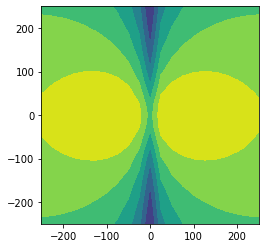

In [22]:
plt.contourf(nx, ny, spl)
plt.axis('square')

83.72727272727273


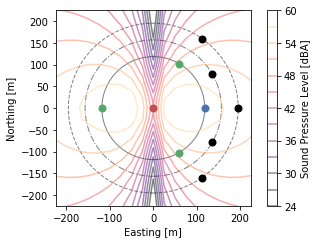

In [23]:
rotangle = 0
rt = np.array([[H+D/2, 0], [H+D/2, 180], [H+D/2, -60], [H+D/2, 60], [H+D, -30], [H+D, 30], [H+3*D/2, -55], [H+3*D/2, 0], [H+3*D/2, 55], ])
rt[:,1] += rotangle

fig,ax = plt.subplots(figsize = (5,3.5))

plt.contour(nx, ny, spl, np.arange(24,60.1, 3), alpha=0.5, cmap='magma')
# plt.axis('square')
leg = plt.colorbar()
leg.set_label('Sound Pressure Level [dBA]')

r0 = mp.Circle((0,0), H+D/2, fill=False, edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+D, fill=False, ls='-.', edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+3*D/2, fill=False, ls='--', edgecolor='gray')
ax.add_patch(r0)

angles = np.unique(rt[:,1])#[np.unique(rt[:,1]) >=-20]
rpos = np.arange(0,(H+2*D))

mic_x = np.array([rt[ii,0]*np.cos(np.radians(rt[ii,1])) for ii in range(len(rt))])
mic_y = np.array([rt[ii,0]*np.sin(np.radians(rt[ii,1])) for ii in range(len(rt))])


ax.plot(0, 0,  'o', markerfacecolor='C2', markeredgecolor='none', markersize=8)
ax.plot(mic_x[0], mic_y[0], 'o', markerfacecolor='C0', markeredgecolor='none', markersize=8)
ax.plot(mic_x[1:4], mic_y[1:4], 'o', markerfacecolor='C1', markeredgecolor='none', markersize=8)
ax.plot(mic_x[4:], mic_y[4:], 'ok', markeredgecolor='none', markersize=8)

dmic_x = mic_x[:,np.newaxis] - mic_x[np.newaxis, :]
dmic_y = mic_y[:,np.newaxis] - mic_y[np.newaxis, :]

dist = np.sqrt(dmic_x**2 + dmic_y**2).round()
dist[dist>100] = np.nan
dist[dist==0.0] = np.nan

avedist = np.nanmean(dist)
print(avedist)

# plt.plot([0, mic_x[0]], [0, mic_y[0]], '-.k', lw=0.5, label=str(H+D/2))

# xvals = np.mean([0, mic_x[0]])
# for ii in range(dist.shape[0]):
#     for jj in range(dist.shape[1]):
#         if np.isnan(dist[ii,jj]):
#             continue
#         else:
#             dx = np.array([mic_x[ii], mic_x[jj]])
#             dy = np.array([mic_y[ii], mic_y[jj]])
#             plt.plot(dx, dy, '--k', lw=0.5, label=str(dist[ii,jj]))
#             xvals = np.append(xvals, dx.mean().round())
            
# labelLines(plt.gca().get_lines(),
#            align=False,
#            xvals=xvals,
#            color='k',)


    
plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.xlim([-225, 225])
plt.ylim([-225, 225])
ax.set_aspect('equal')

fig.tight_layout()
fig.savefig('../figs/meas_loc_spl.pdf', bbox_inches='tight')

78.125


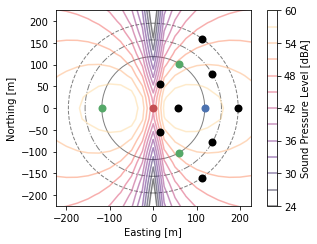

In [24]:
rotangle = 0
rt = np.array([[H+D/2, 0], [H+D/2, 180], [H+D/2, -60], [H+D/2, 60], [H+D, -30], [H+D, 30], [H+3*D/2, -55], [H+3*D/2, 0], [H+3*D/2, 55], [3*D/4, 0], [3*D/4, 75],[3*D/4, -75],])
rt[:,1] += rotangle

fig,ax = plt.subplots(figsize = (5,3.5))

plt.contour(nx, ny, spl, np.arange(24,60.1, 3), alpha=0.5, cmap='magma')
# plt.axis('square')
leg = plt.colorbar()
leg.set_label('Sound Pressure Level [dBA]')

r0 = mp.Circle((0,0), H+D/2, fill=False, edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+D, fill=False, ls='-.', edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+3*D/2, fill=False, ls='--', edgecolor='gray')
ax.add_patch(r0)

angles = np.unique(rt[:,1])#[np.unique(rt[:,1]) >=-20]
rpos = np.arange(0,(H+2*D))

mic_x = np.array([rt[ii,0]*np.cos(np.radians(rt[ii,1])) for ii in range(len(rt))])
mic_y = np.array([rt[ii,0]*np.sin(np.radians(rt[ii,1])) for ii in range(len(rt))])


ax.plot(0, 0,  'o', markerfacecolor='C2', markeredgecolor='none', markersize=8)
ax.plot(mic_x[0], mic_y[0], 'o', markerfacecolor='C0', markeredgecolor='none', markersize=8)
ax.plot(mic_x[1:4], mic_y[1:4], 'o', markerfacecolor='C1', markeredgecolor='none', markersize=8)
ax.plot(mic_x[4:], mic_y[4:], 'ok', markeredgecolor='none', markersize=8)

dmic_x = mic_x[:,np.newaxis] - mic_x[np.newaxis, :]
dmic_y = mic_y[:,np.newaxis] - mic_y[np.newaxis, :]

dist = np.sqrt(dmic_x**2 + dmic_y**2).round()
dist[dist>100] = np.nan
dist[dist==0.0] = np.nan

avedist = np.nanmean(dist)
print(avedist)

    
plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.xlim([-225, 225])
plt.ylim([-225, 225])
ax.set_aspect('equal')

fig.tight_layout()
fig.savefig('../figs/meas_loc_spl_EXTRAMICS.pdf', bbox_inches='tight')

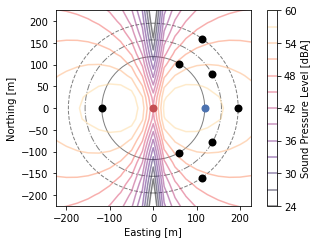

In [25]:
rotangle = 0
rt = np.array([[H+D/2, 0], [H+D/2, 180], [H+D/2, -60], [H+D/2, 60], [H+D, -30], [H+D, 30], [H+3*D/2, -55], [H+3*D/2, 0], [H+3*D/2, 55], ])
rt[:,1] += rotangle

fig,ax = plt.subplots(figsize = (5,3.5))

plt.contour(nx, ny, spl, np.arange(24,60.1, 3), alpha=0.5, cmap='magma')
# plt.axis('square')
leg = plt.colorbar()
leg.set_label('Sound Pressure Level [dBA]')

r0 = mp.Circle((0,0), H+D/2, fill=False, edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+D, fill=False, ls='-.', edgecolor='gray')
ax.add_patch(r0)

r0 = mp.Circle((0,0), H+3*D/2, fill=False, ls='--', edgecolor='gray')
ax.add_patch(r0)

angles = np.unique(rt[:,1])#[np.unique(rt[:,1]) >=-20]
rpos = np.arange(0,(H+2*D))

mic_x = np.array([rt[ii,0]*np.cos(np.radians(rt[ii,1])) for ii in range(len(rt))])
mic_y = np.array([rt[ii,0]*np.sin(np.radians(rt[ii,1])) for ii in range(len(rt))])


ax.plot(0, 0,  'o', markerfacecolor='C2', markeredgecolor='none', markersize=8)
ax.plot(mic_x[0], mic_y[0], 'o', markerfacecolor='C0', markeredgecolor='none', markersize=8)
ax.plot(mic_x[1:4], mic_y[1:4], 'ok', markeredgecolor='none', markersize=8)
ax.plot(mic_x[4:], mic_y[4:], 'ok', markeredgecolor='none', markersize=8)

dmic_x = mic_x[:,np.newaxis] - mic_x[np.newaxis, :]
dmic_y = mic_y[:,np.newaxis] - mic_y[np.newaxis, :]

dist = np.sqrt(dmic_x**2 + dmic_y**2).round()
dist[dist>100] = np.nan
dist[dist==0.0] = np.nan

plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.xlim([-225, 225])
plt.ylim([-225, 225])
ax.set_aspect('equal')

fig.tight_layout()